In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import sklearn.cluster as cluster
warnings.filterwarnings('ignore')

In [175]:
df=pd.read_csv("sysmexdata24.csv")

In [176]:
df

,study_id,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,...,RDW-CV,PDW,MPV,P-LCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
0,31DTS02,20220923,1.69,5.52,15.6,48.8,88.4,28.3,32.0,117,...,15.0,19.5,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4
1,30DTS02,20220923,2.85,5.95,14.2,44.5,74.8,23.9,31.9,189,...,15.8,13.7,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5
2,29DTS02,20220923,1.96,5.81,15.9,48.7,83.8,27.4,32.6,204,...,14.6,15.5,12,40.5,0.24,6.6,68.9,15.3,6.6,2.6
3,28DTS02,20220923,1.95,3.64,5.6,20.5,56.3,15.4,27.3,364,...,23.9,----,----,----,----,13.8,51.8,15.4,15.9,3.1
4,27DTS02,20220923,3.38,5.39,12.8,40.2,74.6,23.7,31.8,256,...,13.3,14,11.6,37,0.3,10.9,64.8,12.4,9.8,2.1
5,24DTS02,20220923,5.69,6.38,17.0,51.0,79.9,26.6,33.3,154,...,13.9,20,13.9,56.2,0.21,33.6,46.9,12.3,4.2,3.0
6,20DTS02,20220923,1.76,5.19,16.0,48.2,92.9,30.8,33.2,136,...,13.9,17.2,12.8,48.8,0.17,9.2,63.6,19.3,4.5,3.4
7,18DTS02,20220923,1.84,4.74,13.0,39.3,82.9,27.4,33.1,90,...,12.9,22.1,16.2,72.8,0.15,44.1,42.4,9.2,1.6,2.7
8,17DTS02,20220923,2.80,5.19,12.7,40.0,77.1,24.5,31.8,148,...,17.1,22,13.3,51.5,0.2,12.1,70.4,12.1,3.6,1.8


In [4]:
c=[]
for i in df["Date"]:
    a=str(i)
    a=a[:4]+" "+a[4:6]+" "+a[6:]
    
    c.append(a)

In [5]:
c

['2022 09 23',
 '2022 09 23',
 '2022 09 23',
 '2022 09 23',
 '2022 09 23',
 '2022 09 23',
 '2022 09 23',
 '2022 09 23',
 '2022 09 23']

In [6]:
df["Date"]=c

In [7]:
year=df["Date"].str.split(" ",expand=True)[0]
year

0    2022
1    2022
2    2022
3    2022
4    2022
5    2022
6    2022
7    2022
8    2022
Name: 0, dtype: object

In [8]:
Date=df["Date"].str.split(" ",expand=True)[2]
Date

0    23
1    23
2    23
3    23
4    23
5    23
6    23
7    23
8    23
Name: 2, dtype: object

In [9]:
Month=df["Date"].str.split(" ",expand=True)[1]
Month

0    09
1    09
2    09
3    09
4    09
5    09
6    09
7    09
8    09
Name: 1, dtype: object

In [10]:
df["Year"]=year

In [11]:
df["Month"]=Month

In [12]:
df["Date"]=Date

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   study_id  9 non-null      object 
 1   Date      9 non-null      object 
 2   WBC       9 non-null      float64
 3   RBC       9 non-null      float64
 4   HGB       9 non-null      float64
 5   HCT       9 non-null      float64
 6   MCV       9 non-null      float64
 7   MCH       9 non-null      float64
 8   MCHC      9 non-null      float64
 9   PLT       9 non-null      int64  
 10  RDW-SD    9 non-null      float64
 11  RDW-CV    9 non-null      float64
 12  PDW       9 non-null      object 
 13  MPV       9 non-null      object 
 14  P-LCR     9 non-null      object 
 15  PCT       9 non-null      object 
 16  NEUT%     9 non-null      float64
 17  LYMPH%    9 non-null      float64
 18  MONO%     9 non-null      float64
 19  EO%       9 non-null      float64
 20  BASO%     9 non-null      float64
 2

In [14]:
#Basic Statistics of Data
df.describe()

,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,RDW-SD,RDW-CV,NEUT%,LYMPH%,MONO%,EO%,BASO%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.657778,5.312222,13.644444,42.355556,78.966667,25.333333,31.888889,184.222222,41.711111,15.600000,15.811111,60.666667,14.455556,6.333333,2.733333
std,1.283177,0.790376,3.405184,9.303643,10.467330,4.372070,1.829238,83.541573,4.691866,3.370831,13.611249,10.716693,3.367162,4.237334,0.574456
min,1.690000,3.640000,5.600000,20.500000,56.300000,15.400000,27.300000,90.000000,35.300000,12.900000,4.900000,42.400000,9.200000,1.600000,1.800000
25%,1.840000,5.190000,12.800000,40.000000,74.800000,23.900000,31.800000,136.000000,38.100000,13.900000,7.100000,51.800000,12.300000,4.200000,2.400000
50%,1.960000,5.390000,14.200000,44.500000,79.900000,26.600000,32.000000,154.000000,41.100000,14.600000,10.900000,64.800000,14.800000,4.900000,2.700000
75%,2.850000,5.810000,15.900000,48.700000,83.800000,27.400000,33.100000,204.000000,46.200000,15.800000,13.800000,68.900000,15.400000,6.600000,3.100000
max,5.690000,6.380000,17.000000,51.000000,92.900000,30.800000,33.300000,364.000000,46.800000,23.900000,44.100000,70.400000,19.300000,15.900000,3.500000


In [15]:
df

,study_id,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,...,MPV,P-LCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%,Year,Month
0,31DTS02,23,1.69,5.52,15.6,48.8,88.4,28.3,32.0,117,...,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4,2022,09
1,30DTS02,23,2.85,5.95,14.2,44.5,74.8,23.9,31.9,189,...,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5,2022,09
2,29DTS02,23,1.96,5.81,15.9,48.7,83.8,27.4,32.6,204,...,12,40.5,0.24,6.6,68.9,15.3,6.6,2.6,2022,09
3,28DTS02,23,1.95,3.64,5.6,20.5,56.3,15.4,27.3,364,...,----,----,----,13.8,51.8,15.4,15.9,3.1,2022,09
4,27DTS02,23,3.38,5.39,12.8,40.2,74.6,23.7,31.8,256,...,11.6,37,0.3,10.9,64.8,12.4,9.8,2.1,2022,09
5,24DTS02,23,5.69,6.38,17.0,51.0,79.9,26.6,33.3,154,...,13.9,56.2,0.21,33.6,46.9,12.3,4.2,3.0,2022,09
6,20DTS02,23,1.76,5.19,16.0,48.2,92.9,30.8,33.2,136,...,12.8,48.8,0.17,9.2,63.6,19.3,4.5,3.4,2022,09
7,18DTS02,23,1.84,4.74,13.0,39.3,82.9,27.4,33.1,90,...,16.2,72.8,0.15,44.1,42.4,9.2,1.6,2.7,2022,09
8,17DTS02,23,2.80,5.19,12.7,40.0,77.1,24.5,31.8,148,...,13.3,51.5,0.2,12.1,70.4,12.1,3.6,1.8,2022,09


In [93]:
df.corr()

,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,RDW-SD,RDW-CV,NEUT%,LYMPH%,MONO%,EO%,BASO%
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WBC,NaN,1.000000,0.568425,0.291137,0.280497,-0.126333,-0.035947,0.249271,0.000378,-0.665825,-0.214606,0.335303,-0.291640,-0.262312,-0.129899,-0.008366
RBC,NaN,0.568425,1.000000,0.884729,0.897494,0.552144,0.608376,0.753502,-0.500071,-0.573748,-0.694339,-0.073250,0.289893,0.105393,-0.582646,0.007525
HGB,NaN,0.291137,0.884729,1.000000,0.997091,0.870585,0.902898,0.922003,-0.751864,-0.324492,-0.844311,0.015765,0.244241,0.100274,-0.751732,0.027265
HCT,NaN,0.280497,0.897494,0.997091,1.000000,0.858977,0.886032,0.896855,-0.731950,-0.310973,-0.821641,-0.045402,0.302691,0.131845,-0.726063,0.011772
MCV,NaN,-0.126333,0.552144,0.870585,0.858977,1.000000,0.992239,0.870600,-0.850518,0.029991,-0.808130,0.024990,0.243849,0.084858,-0.760536,-0.028688
MCH,NaN,-0.035947,0.608376,0.902898,0.886032,0.992239,1.000000,0.922834,-0.867512,-0.068574,-0.857506,0.098108,0.182801,0.039511,-0.806977,-0.013936
MCHC,NaN,0.249271,0.753502,0.922003,0.896855,0.870600,0.922834,1.000000,-0.851897,-0.386087,-0.946513,0.266340,0.055454,-0.127945,-0.886757,-0.054323
PLT,NaN,0.000378,-0.500071,-0.751864,-0.731950,-0.850518,-0.867512,-0.851897,1.000000,0.031150,0.746614,-0.342165,-0.010211,0.200405,0.951336,0.105836
RDW-SD,NaN,-0.665825,-0.573748,-0.324492,-0.310973,0.029991,-0.068574,-0.386087,0.031150,1.000000,0.527015,-0.333846,0.261810,0.294925,0.177850,-0.014532


In [17]:
df

,study_id,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,...,MPV,P-LCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%,Year,Month
0,31DTS02,23,1.69,5.52,15.6,48.8,88.4,28.3,32.0,117,...,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4,2022,09
1,30DTS02,23,2.85,5.95,14.2,44.5,74.8,23.9,31.9,189,...,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5,2022,09
2,29DTS02,23,1.96,5.81,15.9,48.7,83.8,27.4,32.6,204,...,12,40.5,0.24,6.6,68.9,15.3,6.6,2.6,2022,09
3,28DTS02,23,1.95,3.64,5.6,20.5,56.3,15.4,27.3,364,...,----,----,----,13.8,51.8,15.4,15.9,3.1,2022,09
4,27DTS02,23,3.38,5.39,12.8,40.2,74.6,23.7,31.8,256,...,11.6,37,0.3,10.9,64.8,12.4,9.8,2.1,2022,09
5,24DTS02,23,5.69,6.38,17.0,51.0,79.9,26.6,33.3,154,...,13.9,56.2,0.21,33.6,46.9,12.3,4.2,3.0,2022,09
6,20DTS02,23,1.76,5.19,16.0,48.2,92.9,30.8,33.2,136,...,12.8,48.8,0.17,9.2,63.6,19.3,4.5,3.4,2022,09
7,18DTS02,23,1.84,4.74,13.0,39.3,82.9,27.4,33.1,90,...,16.2,72.8,0.15,44.1,42.4,9.2,1.6,2.7,2022,09
8,17DTS02,23,2.80,5.19,12.7,40.0,77.1,24.5,31.8,148,...,13.3,51.5,0.2,12.1,70.4,12.1,3.6,1.8,2022,09


Boxplot For Checking Outliers

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


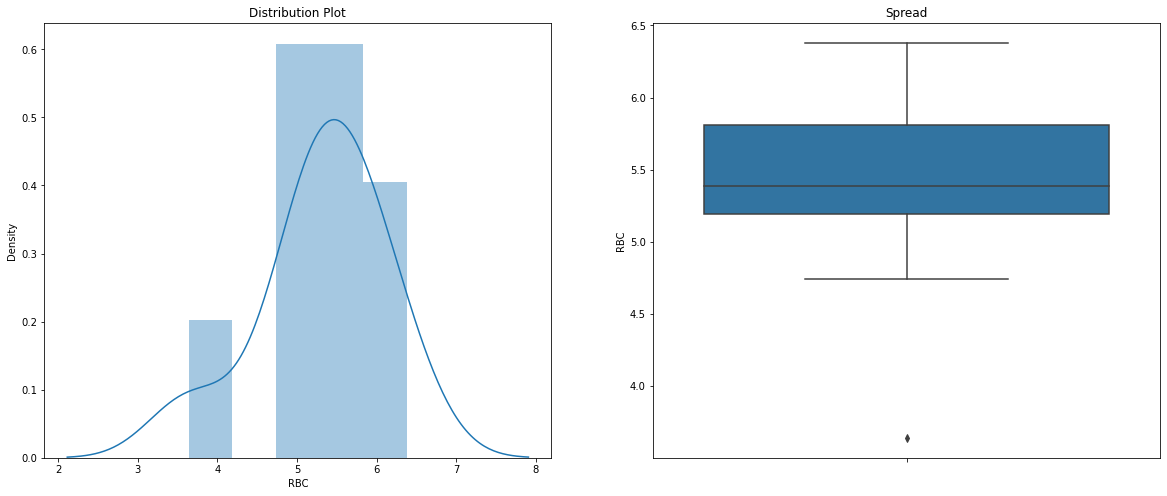

In [25]:
#RBC
#RANGE 3.93-5.69
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df.RBC)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df.RBC)

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


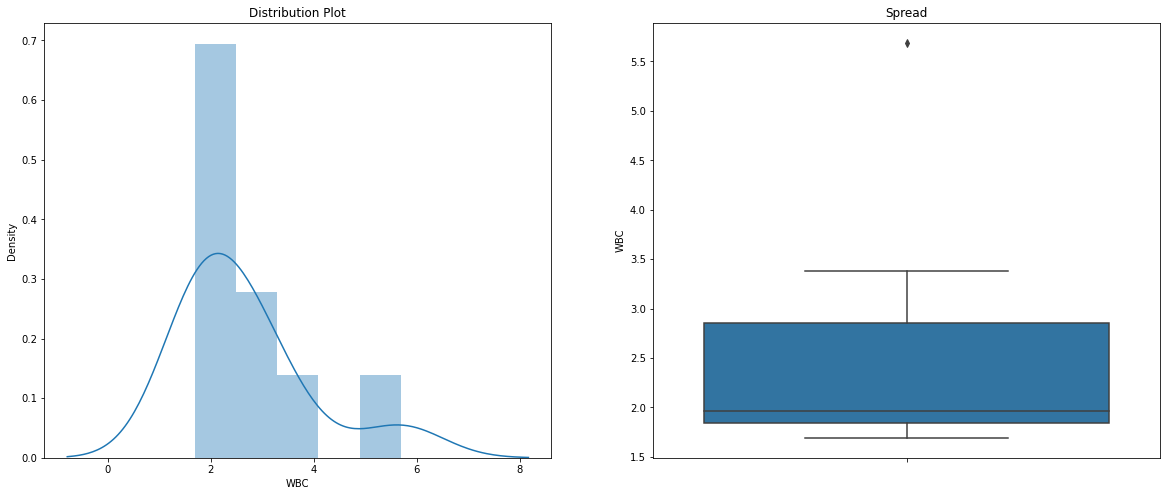

In [26]:
#4.0-10
#WBC Contains NEUT%	LYMPH%	MONO%	EO%	BASO%
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df.WBC)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df.WBC)

plt.show()

In [49]:
def func(df,x,y):
    df1 = pd.DataFrame(df.groupby([x])[y].mean().sort_values(ascending = False))
    df1.plot.bar()
    plt.title('WBC VS'+ str(y))
    plt.show()

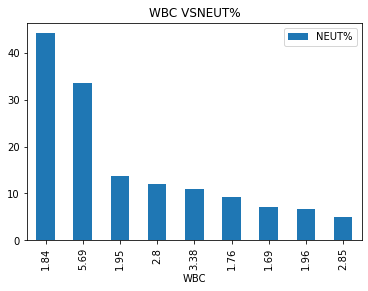

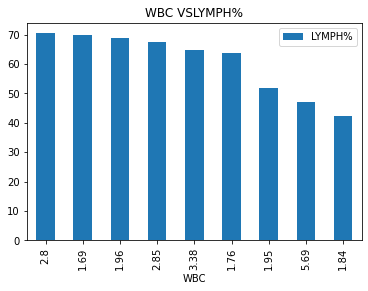

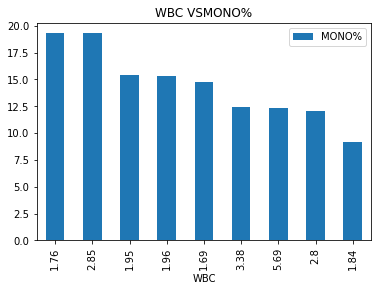

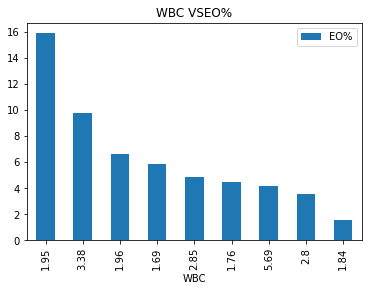

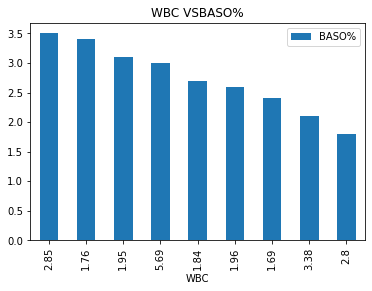

In [53]:
func(df,"WBC","NEUT%")
func(df,"WBC","LYMPH%")
func(df,"WBC","MONO%")
func(df,"WBC","EO%")
func(df,"WBC","BASO%")


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution Plot'}, xlabel='HGB', ylabel='Density'>

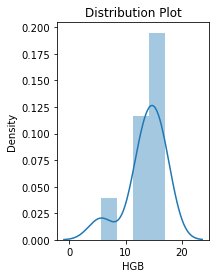

In [56]:
#HGB
plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df.HGB)

In [77]:
#Normal Range of HCT is 40 TO 50
df_1=df[(df["HCT"]>50) | (df["HCT"]<40)]

In [96]:
#Mostly Corr columns against HCT
cor=np.abs(df_1.corr()["HCT"])
bar=cor[cor >= 0.9]
bar

RBC       0.969676
HGB       0.999318
HCT       1.000000
MCH       0.900597
MCHC      0.935667
RDW-SD    0.999888
Name: HCT, dtype: float64

<AxesSubplot:>

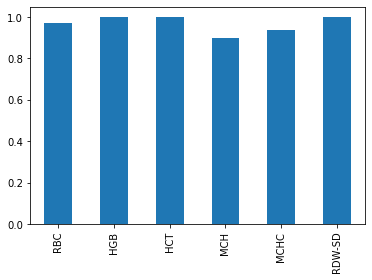

In [97]:
bar.plot(kind="bar")

<ipython-input-91-eadf7440d94d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", cbar = False)


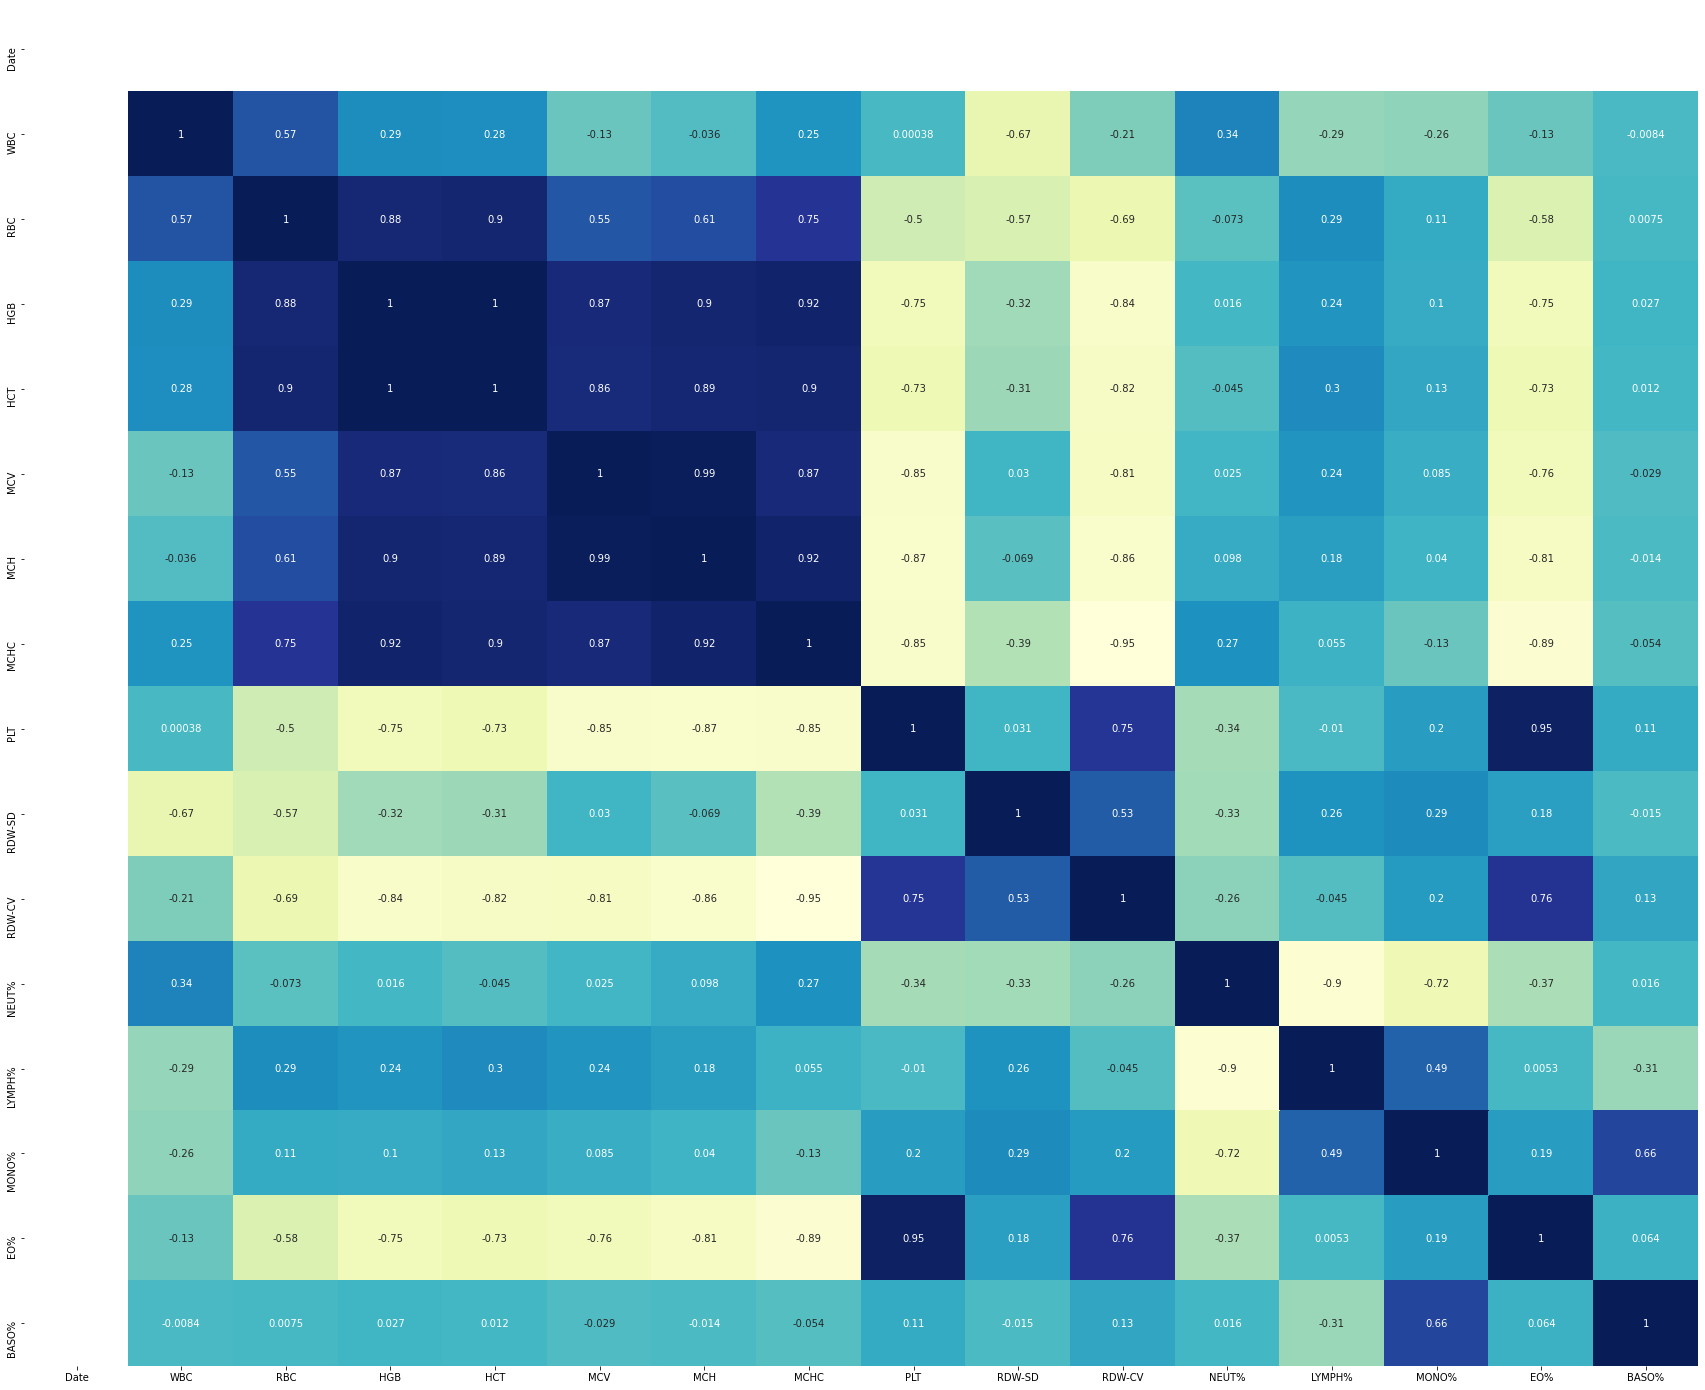

In [91]:
#Heat Map Corr
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", cbar = False)
plt.show()

# Clustering for Finding Outliers

In [171]:
Df=df[["HGB","HCT"]]

In [172]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Df = pd.DataFrame(ss.fit_transform(Df), columns=["HGB","HCT"])

In [174]:
Df

,HGB,HCT
0,0.601434,0.843182
1,-0.284890,-0.133433
2,0.791361,0.820470
3,-1.171215,-1.110048
4,1.487759,1.342845
5,0.854670,0.706910
6,-1.044597,-1.314455
7,-1.234523,-1.155472


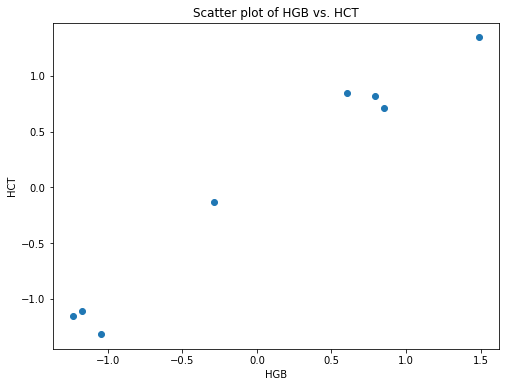

In [178]:
plt.figure(figsize=(8,6))
plt.scatter(Df.HGB, Df.HCT)
plt.xlabel('HGB')
plt.ylabel('HCT')
plt.title('Scatter plot of HGB vs. HCT')
plt.show()


In [180]:
km = KMeans(n_clusters=4)
model = km.fit(Df)

0
1
2
3


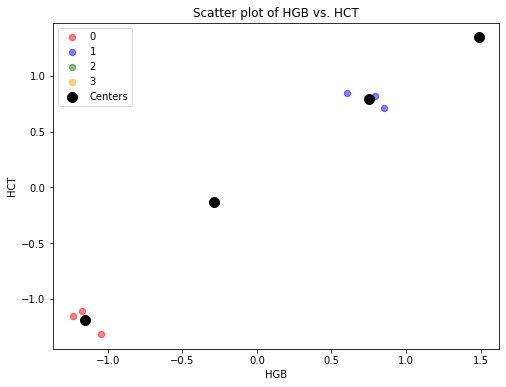

In [189]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    print(i)
    plt.scatter(Df[model.labels_==i].HGB, Df[model.labels_==i].HCT, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of  Data",size=20)
plt.xlabel("HGB")
plt.ylabel("HCT")
plt.title('Scatter plot of HGB vs. HCT')
plt.legend()
plt.show()


In [204]:
model.cluster_centers_[Df.label,0]

array([ 0.74915524, -0.28489002,  0.74915524, -1.15011157,  1.487759  ,
        0.74915524, -1.15011157, -1.15011157])

In [197]:
def distance_from_center(HGB, HCT, label):
    
    "Calculate the Euclidean distance between a data point and the center of its cluster."

    center_HGB =  model.cluster_centers_[label,0]
    print(center_HGB)
    center_HCT =  model.cluster_centers_[label,1]
    distance = np.sqrt((HGB - center_HGB) ** 2 + (HCT - center_HCT) ** 2)
    print(distance)
    return np.round(distance, 3)
Df['label'] = model.labels_
Df['distance'] = distance_from_center(Df.HGB, Df.HCT, Df.label)

[ 0.74915524 -0.28489002  0.74915524 -1.15011157  1.487759    0.74915524
 -1.15011157 -1.15011157]
0    1.569390e-01
1    0.000000e+00
2    5.194592e-02
3    8.590944e-02
4    2.220446e-16
5    1.344190e-01
6    1.606424e-01
7    9.251072e-02
dtype: float64


In [186]:
Df

,HGB,HCT,label,distance
0,0.601434,0.843182,1,0.157
1,-0.284890,-0.133433,2,0.000
2,0.791361,0.820470,1,0.052
3,-1.171215,-1.110048,0,0.086
4,1.487759,1.342845,3,0.000
5,0.854670,0.706910,1,0.134
6,-1.044597,-1.314455,0,0.161
7,-1.234523,-1.155472,0,0.093


# RESULT

In [187]:
outliers_idx = list(Df.sort_values('distance', ascending=False).head(10).index)
outliers = Df[Df.index.isin(outliers_idx)]
print(outliers)

        HGB       HCT  label  distance
0  0.601434  0.843182      1     0.157
1 -0.284890 -0.133433      2     0.000
2  0.791361  0.820470      1     0.052
3 -1.171215 -1.110048      0     0.086
4  1.487759  1.342845      3     0.000
5  0.854670  0.706910      1     0.134
6 -1.044597 -1.314455      0     0.161
7 -1.234523 -1.155472      0     0.093


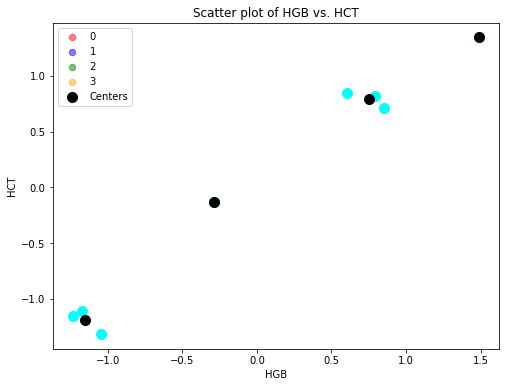

In [188]:
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(Df[model.labels_==i].HGB, Df[model.labels_==i].HCT, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.HGB, outliers.HCT, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering Data",size=20)
plt.xlabel("HGB")
plt.ylabel("HCT")
plt.title('Scatter plot of HGB vs. HCT')
plt.legend()
plt.show()
